In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
data = pd.read_excel('DataSet.xlsx')
print(data.head())

   num_rooms  num_people  is_ac  is_tv  is_flat  ave_monthly_income  \
0          3           3      1      1        1             9675.93   
1          1           5      0      1        0            35064.79   
2          3           1      1      1        1            22292.44   
3          0           5      1      1        0            12139.08   
4          1           8      0      1        0            17230.10   

   num_children        unit  
0             2  270.315201  
1             1  285.805038  
2             0  259.974289  
3             0  221.913199  
4             2  291.124601  


In [ ]:
# Checking for missing values
print(data.isnull().sum())

# Fill missing values or drop rows (example)
data.fillna(data.mean(), inplace=True)

# Convert binary categorical features to 0/1
data['is_ac'] = data['is_ac'].apply(lambda x: 1 if x == 'yes' else 0)
data['is_tv'] = data['is_tv'].apply(lambda x: 1 if x == 'yes' else 0)
data['is_flat'] = data['is_flat'].apply(lambda x: 1 if x == 'yes' else 0)

# Show the dataset after preprocessing
print(data.head())


num_rooms             0
num_people            0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
unit                  0
dtype: int64
   num_rooms  num_people  is_ac  is_tv  is_flat  ave_monthly_income  \
0          3           3      0      0        0             9675.93   
1          1           5      0      0        0            35064.79   
2          3           1      0      0        0            22292.44   
3          0           5      0      0        0            12139.08   
4          1           8      0      0        0            17230.10   

   num_children        unit  
0             2  270.315201  
1             1  285.805038  
2             0  259.974289  
3             0  221.913199  
4             2  291.124601  


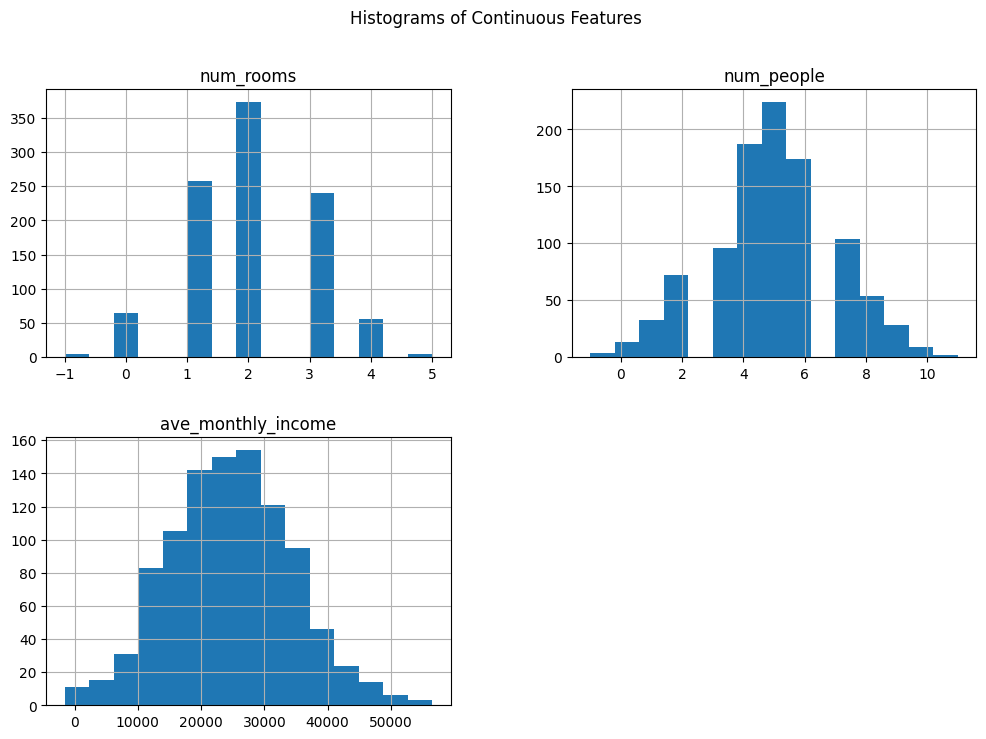

In [ ]:
# Plotting histograms for continuous features
data[['num_rooms', 'num_people', 'ave_monthly_income']].hist(bins=15, figsize=(12, 8))
plt.suptitle('Histograms of Continuous Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

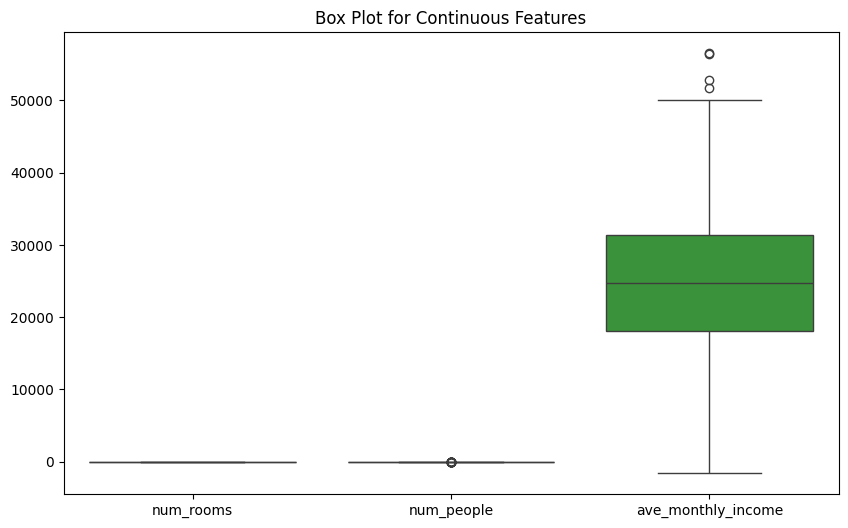

In [ ]:
# Plotting box plots to detect outliers in continuous features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['num_rooms', 'num_people', 'ave_monthly_income']])
plt.title('Box Plot for Continuous Features')
plt.show()

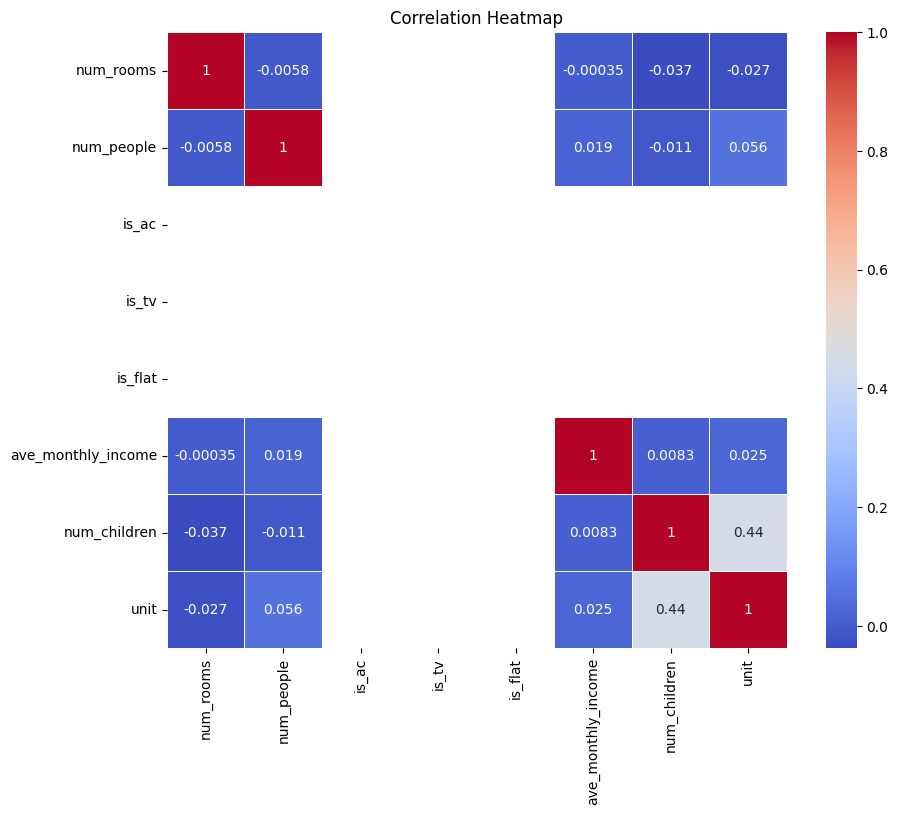

In [ ]:
# Plotting a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

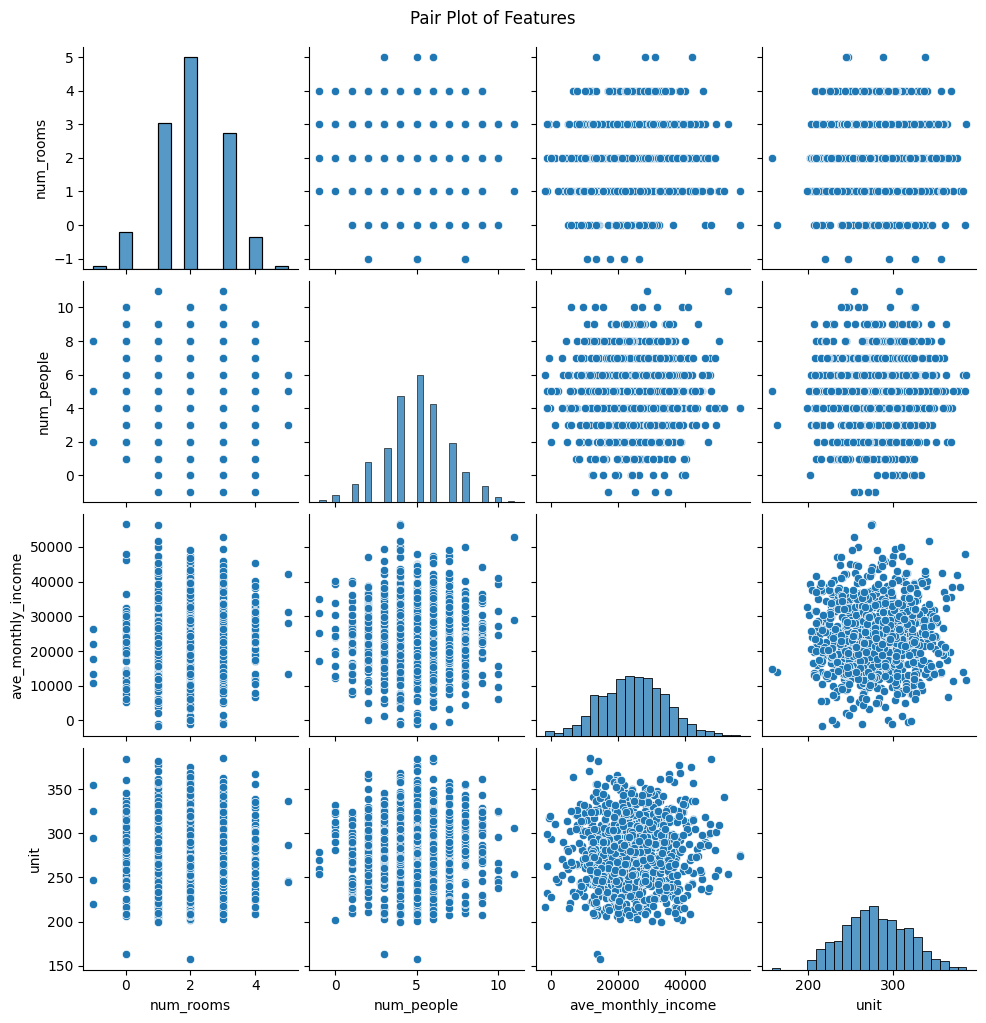

In [ ]:
# Pair plot of continuous features and target
sns.pairplot(data[['num_rooms', 'num_people', 'ave_monthly_income', 'unit']])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


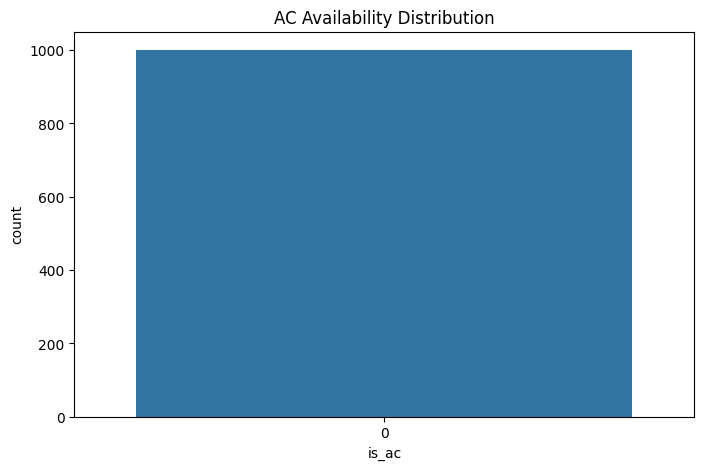

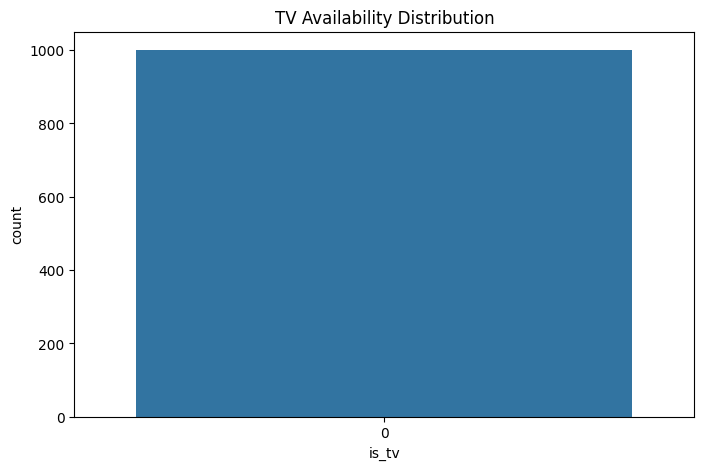

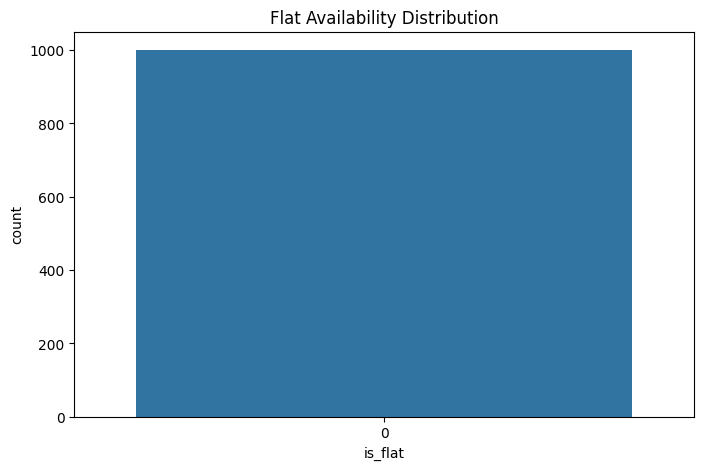

In [ ]:
# Bar plot for categorical features
plt.figure(figsize=(8, 5))
sns.countplot(x='is_ac', data=data)
plt.title('AC Availability Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='is_tv', data=data)
plt.title('TV Availability Distribution')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='is_flat', data=data)
plt.title('Flat Availability Distribution')
plt.show()


In [ ]:
# Define the features and target variable
X = data[['num_rooms', 'num_people', 'is_ac', 'is_tv', 'is_flat', 'ave_monthly_income', 'num_children']]
y = data['unit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)


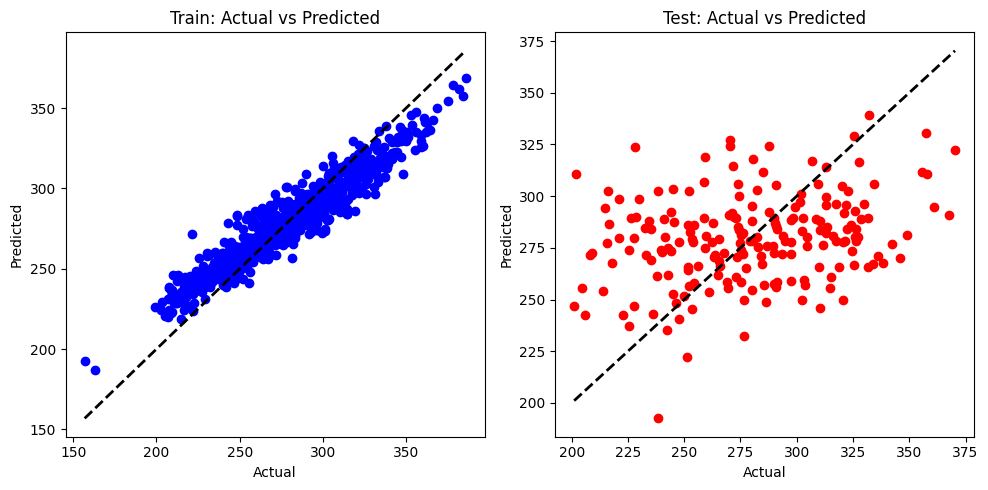

In [ ]:
import matplotlib.pyplot as plt

# Assuming you've already trained the model and made predictions

# Training data predictions
y_train_pred = model.predict(X_train_scaled)

# Test data predictions
y_test_pred = model.predict(X_test_scaled)

# Plot predicted vs. actual for the training set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train: Actual vs Predicted')

# Plot predicted vs. actual for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test: Actual vs Predicted')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 1442.1521626242893
R² Score: -0.005008546570803629


In [ ]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Save the trained model
joblib.dump(model, 'unit_prediction_model.pkl')


['unit_prediction_model.pkl']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Save both the trained model and the scaler
joblib.dump(model, 'unit_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler as well


['scaler.pkl']

In [ ]:
import joblib
import numpy as np

# Load the saved model
model = joblib.load('unit_prediction_model.pkl')

# Function to preprocess user input and predict the unit
def predict_unit(num_rooms, num_people, is_ac, is_tv, is_flat, ave_monthly_income, num_children):
    # Preprocessing: Convert is_ac, is_tv, and is_flat to 0/1 (assuming input is 'yes' or 'no')
    is_ac = 1 if is_ac.lower() == 'yes' else 0
    is_tv = 1 if is_tv.lower() == 'yes' else 0
    is_flat = 1 if is_flat.lower() == 'yes' else 0

    # Create input array
    input_data = np.array([[num_rooms, num_people, is_ac, is_tv, is_flat, ave_monthly_income, num_children]])

    # Standardize input data using the same scaler used during training
    scaler = joblib.load('scaler.pkl')  # Assuming you saved the scaler during training
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction
    predicted_unit = model.predict(input_data_scaled)

    return predicted_unit[0]  # Return the predicted value

# Accept user inputs
num_rooms = float(input("Enter number of rooms: "))
num_people = float(input("Enter number of people: "))
is_ac = input("Is there an AC (yes/no): ")
is_tv = input("Is there a TV (yes/no): ")
is_flat = input("Is it a flat (yes/no): ")
ave_monthly_income = float(input("Enter average monthly income: "))
num_children = float(input("Enter number of children: "))

# Predict the unit based on input values
predicted_unit = predict_unit(num_rooms, num_people, is_ac, is_tv, is_flat, ave_monthly_income, num_children)

print(f"Predicted Unit: {predicted_unit}")


Enter number of rooms: 1
Enter number of people: 2
Is there an AC (yes/no): no
Is there a TV (yes/no): yes
Is it a flat (yes/no): yes
Enter average monthly income: 34000
Enter number of children: 0
Predicted Unit: 273.7393816921275


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pip install lightgbm matplotlib seaborn


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   num_rooms  num_people  is_ac  is_tv  is_flat  ave_monthly_income  \
0          3           3      1      1        1             9675.93   
1          1           5      0      1        0            35064.79   
2          3           1      1      1        1            22292.44   
3          0           5      1      1        0            12139.08   
4          1           8      0      1        0            17230.10   

   num_children        unit  
0             2  270.315201  
1             1  285.805038  
2             0  259.974289  
3             0  221.913199  
4             2  291.124601  
num_rooms             0
num_people            0
is_ac                 0
is_tv                 0
is_flat               0
ave_monthly_income    0
num_children          0
unit                  0
dtype: int64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

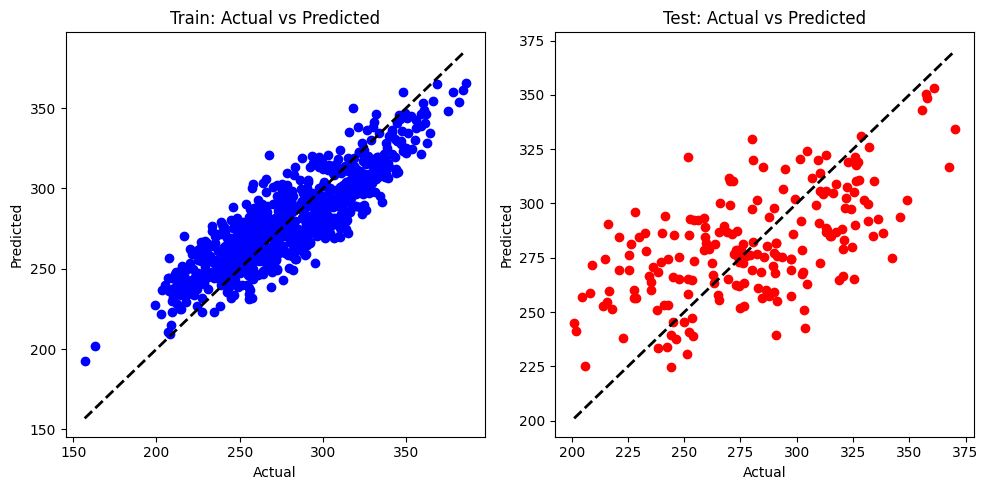

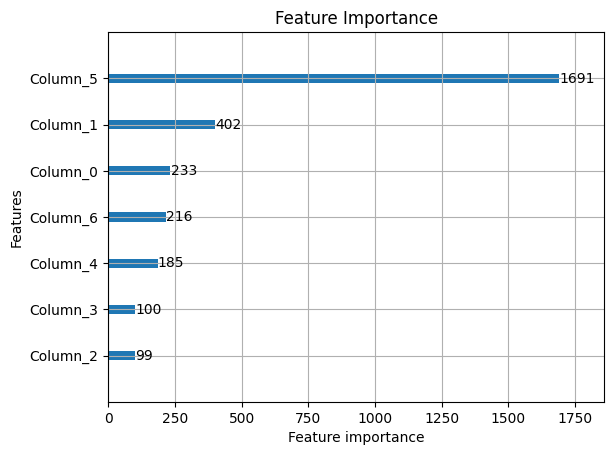

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_excel('DataSet.xlsx')

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Assume 'unit' is the target variable and the rest are features
X = data.drop(columns=['unit'])
y = data['unit']

# Encode categorical variables if necessary (for example, 'is_ac', 'is_tv', 'is_flat')
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LightGBM Regressor
model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print MSE
print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")

# Save the model
joblib.dump(model, 'lightgbm_unit_prediction_model.pkl')
joblib.dump(scaler, 'lightgbm_scaler.pkl')

# ---- Visualization ----

# Plot predicted vs actual values for training set
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train: Actual vs Predicted')

# Plot predicted vs actual values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Plot feature importance
lgb.plot_importance(model, importance_type='split', max_num_features=10)
plt.title('Feature Importance')
plt.show()


In [2]:
import numpy as np
import pandas as pd
import joblib

# Load the trained model and scaler
model = joblib.load('lightgbm_unit_prediction_model.pkl')
scaler = joblib.load('lightgbm_scaler.pkl')

# Load the original dataset to determine the feature names used during training
original_data = pd.read_excel('DataSet.xlsx')

# Get the original feature names used for training
# Exclude the target variable ('unit') if it's in the columns
original_feature_names = [col for col in original_data.columns if col != 'unit']

# Function to predict unit based on user input
def predict_unit(num_rooms, num_people, is_ac, is_tv, is_flat, ave_monthly_income, num_children):
    # Create a DataFrame from the input
    input_data = pd.DataFrame({
        'num_rooms': [num_rooms],
        'num_people': [num_people],
        'is_ac': [is_ac],
        'is_tv': [is_tv],
        'is_flat': [is_flat],
        'ave_monthly_income': [ave_monthly_income],
        'num_children': [num_children]
    })

    # One-hot encode categorical variables (if necessary)
    input_data = pd.get_dummies(input_data, drop_first=True)

    # Add missing columns with 0s based on original feature names
    for col in original_feature_names:
        if col not in input_data.columns:
            input_data[col] = 0  # Fill missing columns with 0

    # Reorder the columns to match the training feature order
    input_data = input_data[original_feature_names]

    # Scale the features
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    predicted_unit = model.predict(input_data_scaled)

    return predicted_unit[0]

# Get user input
try:
    num_rooms = float(input("Enter number of rooms: "))
    num_people = float(input("Enter number of people: "))
    is_ac = int(input("Is there an AC (1 for Yes, 0 for No): "))
    is_tv = int(input("Is there a TV (1 for Yes, 0 for No): "))
    is_flat = int(input("Is it a flat (1 for Yes, 0 for No): "))
    ave_monthly_income = float(input("Enter average monthly income: "))
    num_children = float(input("Enter number of children: "))

    # Print the captured inputs for debugging
    print(f"Inputs: num_rooms={num_rooms}, num_people={num_people}, is_ac={is_ac}, is_tv={is_tv}, "
          f"is_flat={is_flat}, ave_monthly_income={ave_monthly_income}, num_children={num_children}")

    # Make prediction
    predicted_unit = predict_unit(num_rooms, num_people, is_ac, is_tv, is_flat, ave_monthly_income, num_children)
    print(f"Predicted Unit: {predicted_unit}")

except ValueError as e:
    print("Invalid input! Please enter numeric values.")
    print(f"Error details: {e}")


ModuleNotFoundError: No module named 'lightgbm'